In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from keras.optimizers import RMSprop, Adam
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

#**Load Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/weather_prediction_dataset.csv')

In [ ]:
data

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [ ]:
data.isnull().sum()

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64

In [ ]:
columns = [i for i in data.columns if 'TOURS' in i]
data = data[['DATE']+columns]

In [ ]:
data

,DATE,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...
3649,20091228,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [ ]:
def train_validate_split(data):
    train, val =[], []
    for i in data.values:
      if i[0] <= 20071231:
        train.append(i[1:])
      if i[0] > 20071231:
        val.append(i[1:])
    return np.array(train), np.array(val)

train , validate = train_validate_split(data)

In [ ]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)[: , -1]

In [ ]:
def build_simple_rnn(num_units=128, embedding=4,num_dense=32,lr=0.001):
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(embedding, 8), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))

    return model

In [ ]:
def build_lstm(num_units=128, embedding=4,num_dense=32,lr=0.001):
    model = Sequential()
    model.add(LSTM(units=num_units, input_shape=(embedding, 8), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))

    return model

In [ ]:
def build_gru(num_units=128, embedding=4,num_dense=32,lr=0.001):
    model = Sequential()
    model.add(GRU(units=num_units, input_shape=(embedding, 8), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))

    return model

#**Step Size = 3**

In [ ]:
step = 3
x_train, y_train = convertToMatrix(train, step)
x_val, y_val = convertToMatrix(validate, step)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=15)

**Simple RNN**

In [ ]:
simple_rnn_model = build_simple_rnn(num_units=16,num_dense=8,embedding=3,lr=0.0005)
simple_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 16)                400       
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = simple_rnn_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
92/92 [==============================] - 5s 13ms/step - loss: 129.4139 - val_loss: 9.8959
Epoch 2/1000
92/92 [==============================] - 1s 10ms/step - loss: 10.4395 - val_loss: 9.3159
Epoch 3/1000
92/92 [==============================] - 1s 10ms/step - loss: 9.8895 - val_loss: 8.6786
Epoch 4/1000
92/92 [==============================] - 1s 6ms/step - loss: 9.3034 - val_loss: 8.3083
Epoch 5/1000
92/92 [==============================] - 1s 6ms/step - loss: 9.0093 - val_loss: 8.1045
Epoch 6/1000
92/92 [==============================] - 1s 6ms/step - loss: 8.7280 - val_loss: 7.9210
Epoch 7/1000
92/92 [==============================] - 1s 6ms/step - loss: 8.5733 - val_loss: 7.7619
Epoch 8/1000
92/92 [==============================] - 0s 5ms/step - loss: 8.3891 - val_loss: 7.6445
Epoch 9/1000
92/92 [==============================] - 1s 6ms/step - loss: 8.2140 - val_loss: 7.5695
Epoch 10/1000
92/92 [==============================] - 0s 5ms/step - loss: 8.0928 - val_loss: 

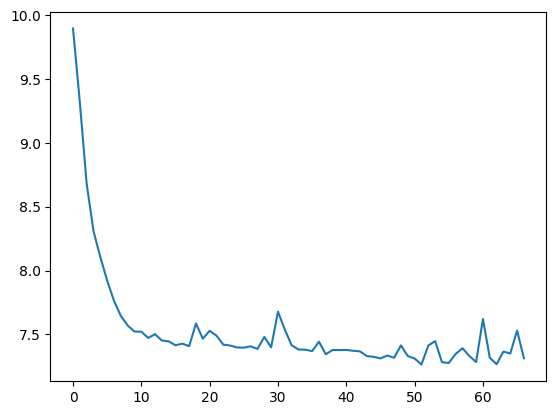

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

**LSTM**

In [ ]:
lstm_model = build_lstm(num_units=16,num_dense=8,embedding=3,lr=0.0005)
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16)                1600      
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = lstm_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
92/92 [==============================] - 3s 21ms/step - loss: 263.4039 - val_loss: 90.8637
Epoch 2/1000
92/92 [==============================] - 2s 17ms/step - loss: 24.7757 - val_loss: 11.4052
Epoch 3/1000
92/92 [==============================] - 1s 9ms/step - loss: 12.0976 - val_loss: 10.0621
Epoch 4/1000
92/92 [==============================] - 1s 9ms/step - loss: 10.2740 - val_loss: 8.9557
Epoch 5/1000
92/92 [==============================] - 1s 9ms/step - loss: 9.4093 - val_loss: 8.8167
Epoch 6/1000
92/92 [==============================] - 1s 9ms/step - loss: 8.9649 - val_loss: 8.1847
Epoch 7/1000
92/92 [==============================] - 1s 9ms/step - loss: 8.5971 - val_loss: 8.0203
Epoch 8/1000
92/92 [==============================] - 1s 9ms/step - loss: 8.4351 - val_loss: 7.8701
Epoch 9/1000
92/92 [==============================] - 1s 9ms/step - loss: 8.2992 - val_loss: 8.0059
Epoch 10/1000
92/92 [==============================] - 1s 9ms/step - loss: 8.2181 - val_lo

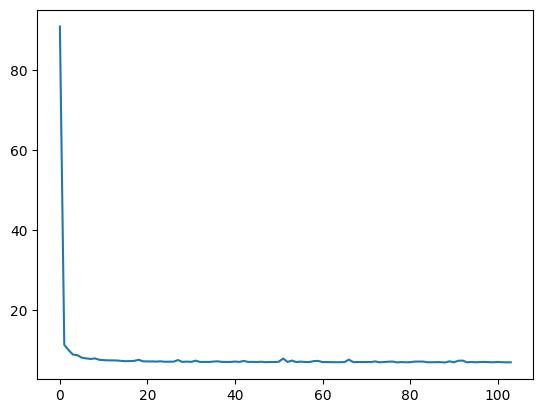

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

**GRU**

In [ ]:
gru_model = build_gru(num_units=16,num_dense=8,embedding=3,lr=0.0005)
gru_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 16)                1248      
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = gru_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
92/92 [==============================] - 2s 12ms/step - loss: 168.8132 - val_loss: 16.2046
Epoch 2/1000
92/92 [==============================] - 1s 10ms/step - loss: 12.7607 - val_loss: 10.0228
Epoch 3/1000
92/92 [==============================] - 1s 10ms/step - loss: 10.0051 - val_loss: 8.5292
Epoch 4/1000
92/92 [==============================] - 1s 13ms/step - loss: 8.8794 - val_loss: 8.3820
Epoch 5/1000
92/92 [==============================] - 2s 19ms/step - loss: 8.5881 - val_loss: 7.9643
Epoch 6/1000
92/92 [==============================] - 1s 15ms/step - loss: 8.3823 - val_loss: 8.0065
Epoch 7/1000
92/92 [==============================] - 1s 9ms/step - loss: 8.2342 - val_loss: 7.6236
Epoch 8/1000
92/92 [==============================] - 1s 9ms/step - loss: 8.0076 - val_loss: 7.6405
Epoch 9/1000
92/92 [==============================] - 1s 10ms/step - loss: 7.8951 - val_loss: 7.4163
Epoch 10/1000
92/92 [==============================] - 1s 9ms/step - loss: 7.7987 - val

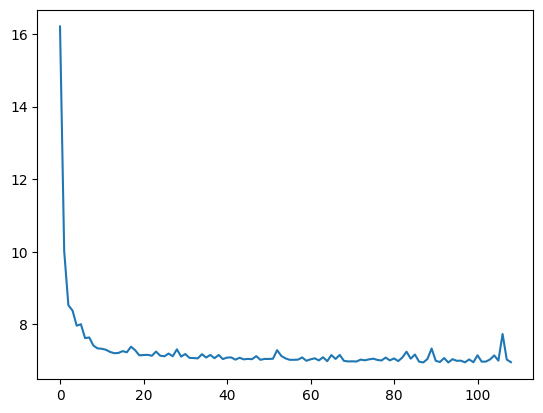

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

#**Step Size = 10**

In [ ]:
step = 10
x_train, y_train = convertToMatrix(train, step)
x_val, y_val = convertToMatrix(validate, step)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=15)

**Simple RNN**

In [ ]:
simple_rnn_model = build_simple_rnn(num_units=16,num_dense=8,embedding=10,lr=0.0005)
simple_rnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 16)                400       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = simple_rnn_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
91/91 [==============================] - 1s 7ms/step - loss: 158.8425 - val_loss: 12.7190
Epoch 2/1000
91/91 [==============================] - 1s 8ms/step - loss: 14.3532 - val_loss: 11.9681
Epoch 3/1000
91/91 [==============================] - 1s 8ms/step - loss: 13.8739 - val_loss: 11.8818
Epoch 4/1000
91/91 [==============================] - 1s 8ms/step - loss: 13.5331 - val_loss: 11.3167
Epoch 5/1000
91/91 [==============================] - 1s 8ms/step - loss: 12.8113 - val_loss: 10.1077
Epoch 6/1000
91/91 [==============================] - 1s 8ms/step - loss: 11.0788 - val_loss: 9.7392
Epoch 7/1000
91/91 [==============================] - 0s 5ms/step - loss: 10.3297 - val_loss: 9.0374
Epoch 8/1000
91/91 [==============================] - 1s 6ms/step - loss: 9.9530 - val_loss: 8.7845
Epoch 9/1000
91/91 [==============================] - 0s 5ms/step - loss: 9.6237 - val_loss: 8.5979
Epoch 10/1000
91/91 [==============================] - 1s 6ms/step - loss: 9.3286 - val

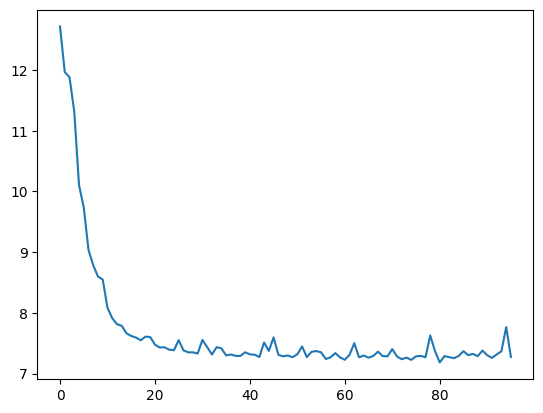

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

**LSTM**

In [ ]:
lstm_model = build_lstm(num_units=16,num_dense=8,embedding=10,lr=0.0005)
lstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 16)                1600      
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = lstm_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
91/91 [==============================] - 2s 13ms/step - loss: 691.6000 - val_loss: 139.1105
Epoch 2/1000
91/91 [==============================] - 1s 10ms/step - loss: 39.0772 - val_loss: 13.5094
Epoch 3/1000
91/91 [==============================] - 1s 10ms/step - loss: 13.3843 - val_loss: 10.7053
Epoch 4/1000
91/91 [==============================] - 1s 9ms/step - loss: 11.1523 - val_loss: 9.6853
Epoch 5/1000
91/91 [==============================] - 1s 7ms/step - loss: 10.0399 - val_loss: 8.9680
Epoch 6/1000
91/91 [==============================] - 1s 8ms/step - loss: 9.2701 - val_loss: 8.9280
Epoch 7/1000
91/91 [==============================] - 1s 7ms/step - loss: 8.7328 - val_loss: 8.1728
Epoch 8/1000
91/91 [==============================] - 1s 7ms/step - loss: 8.4085 - val_loss: 8.2055
Epoch 9/1000
91/91 [==============================] - 1s 7ms/step - loss: 8.1629 - val_loss: 7.9625
Epoch 10/1000
91/91 [==============================] - 1s 7ms/step - loss: 8.0284 - val

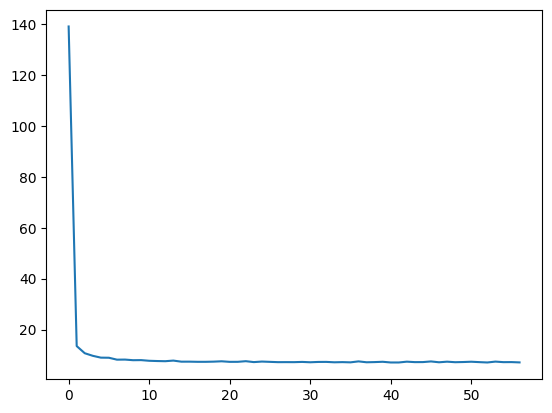

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

**GRU**

In [ ]:
gru_model = build_gru(num_units=16,num_dense=8,embedding=10,lr=0.0005)
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 16)                1248      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = gru_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
91/91 [==============================] - 6s 11ms/step - loss: 104.6396 - val_loss: 12.3175
Epoch 2/1000
91/91 [==============================] - 1s 7ms/step - loss: 12.4101 - val_loss: 9.7380
Epoch 3/1000
91/91 [==============================] - 1s 8ms/step - loss: 10.6233 - val_loss: 9.0590
Epoch 4/1000
91/91 [==============================] - 1s 7ms/step - loss: 9.8587 - val_loss: 8.4923
Epoch 5/1000
91/91 [==============================] - 1s 8ms/step - loss: 9.2581 - val_loss: 8.1875
Epoch 6/1000
91/91 [==============================] - 1s 7ms/step - loss: 8.7997 - val_loss: 7.9292
Epoch 7/1000
91/91 [==============================] - 1s 7ms/step - loss: 8.5548 - val_loss: 7.7738
Epoch 8/1000
91/91 [==============================] - 1s 8ms/step - loss: 8.2975 - val_loss: 7.7305
Epoch 9/1000
91/91 [==============================] - 1s 7ms/step - loss: 8.1426 - val_loss: 7.6102
Epoch 10/1000
91/91 [==============================] - 1s 7ms/step - loss: 8.0883 - val_loss: 

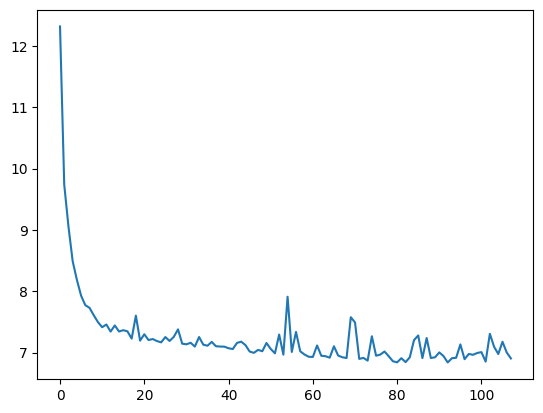

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

#**Step Size = 30**

In [ ]:
step = 30
x_train, y_train = convertToMatrix(train, step)
x_val, y_val = convertToMatrix(validate, step)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=15)

**Simple RNN**

In [ ]:
simple_rnn_model = build_simple_rnn(num_units=16,num_dense=8,embedding=30,lr=0.0005)
simple_rnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 16)                400       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = simple_rnn_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
91/91 [==============================] - 3s 23ms/step - loss: 35.6173 - val_loss: 10.6675
Epoch 2/1000
91/91 [==============================] - 2s 21ms/step - loss: 12.3852 - val_loss: 9.9850
Epoch 3/1000
91/91 [==============================] - 2s 20ms/step - loss: 11.5436 - val_loss: 9.8098
Epoch 4/1000
91/91 [==============================] - 3s 29ms/step - loss: 10.9140 - val_loss: 9.0490
Epoch 5/1000
91/91 [==============================] - 3s 30ms/step - loss: 10.3656 - val_loss: 8.8517
Epoch 6/1000
91/91 [==============================] - 2s 21ms/step - loss: 9.9867 - val_loss: 8.7204
Epoch 7/1000
91/91 [==============================] - 2s 21ms/step - loss: 9.6592 - val_loss: 8.5020
Epoch 8/1000
91/91 [==============================] - 2s 21ms/step - loss: 9.3847 - val_loss: 9.9152
Epoch 9/1000
91/91 [==============================] - 2s 20ms/step - loss: 9.3353 - val_loss: 8.1229
Epoch 10/1000
91/91 [==============================] - 2s 20ms/step - loss: 8.9329 - 

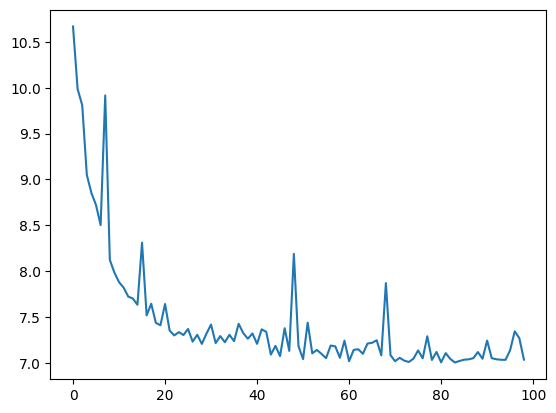

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

**LSTM**

In [ ]:
lstm_model = build_lstm(num_units=16,num_dense=8,embedding=30,lr=0.0005)
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 16)                1600      
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = lstm_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
91/91 [==============================] - 6s 53ms/step - loss: 50.9931 - val_loss: 11.0970
Epoch 2/1000
91/91 [==============================] - 7s 76ms/step - loss: 11.6486 - val_loss: 8.1537
Epoch 3/1000
91/91 [==============================] - 4s 47ms/step - loss: 9.2813 - val_loss: 7.5881
Epoch 4/1000
91/91 [==============================] - 5s 57ms/step - loss: 8.6078 - val_loss: 7.3777
Epoch 5/1000
91/91 [==============================] - 6s 66ms/step - loss: 8.3817 - val_loss: 7.2609
Epoch 6/1000
91/91 [==============================] - 4s 47ms/step - loss: 8.0690 - val_loss: 7.1873
Epoch 7/1000
91/91 [==============================] - 6s 71ms/step - loss: 7.8936 - val_loss: 7.1109
Epoch 8/1000
91/91 [==============================] - 4s 48ms/step - loss: 7.9074 - val_loss: 7.3529
Epoch 9/1000
91/91 [==============================] - 5s 50ms/step - loss: 7.7927 - val_loss: 7.0105
Epoch 10/1000
91/91 [==============================] - 7s 80ms/step - loss: 7.6845 - val

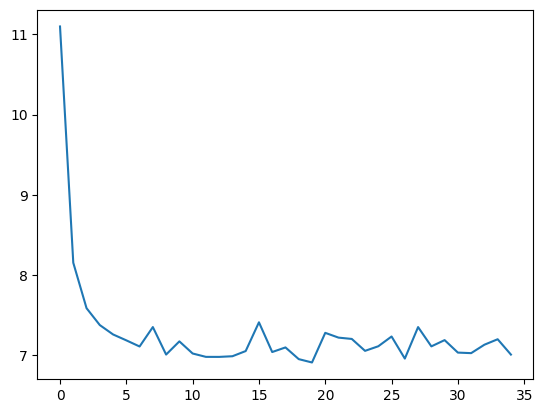

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

**GRU**

In [ ]:
gru_model = build_gru(num_units=16,num_dense=8,embedding=30,lr=0.0005)
gru_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 16)                1248      
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = gru_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
181/181 [==============================] - 13s 64ms/step - loss: 262.0805 - val_loss: 45.3414
Epoch 2/1000
181/181 [==============================] - 10s 53ms/step - loss: 13.3862 - val_loss: 9.5910
Epoch 3/1000
181/181 [==============================] - 12s 65ms/step - loss: 9.8042 - val_loss: 9.1099
Epoch 4/1000
181/181 [==============================] - 12s 65ms/step - loss: 9.0671 - val_loss: 8.1669
Epoch 5/1000
181/181 [==============================] - 11s 63ms/step - loss: 8.4293 - val_loss: 7.8526
Epoch 6/1000
181/181 [==============================] - 11s 63ms/step - loss: 8.0835 - val_loss: 7.5358
Epoch 7/1000
181/181 [==============================] - 10s 57ms/step - loss: 7.8624 - val_loss: 7.3825
Epoch 8/1000
181/181 [==============================] - 10s 56ms/step - loss: 7.7854 - val_loss: 7.3845
Epoch 9/1000
181/181 [==============================] - 12s 64ms/step - loss: 7.6407 - val_loss: 7.1589
Epoch 10/1000
181/181 [==============================] - 12s

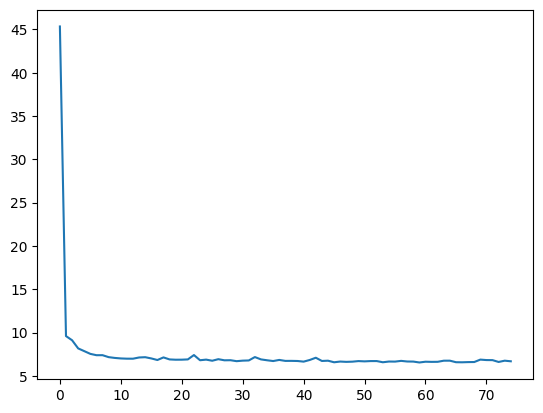

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

<table>
        <thead>    <!--Table Head-->
            <th>Step Size</th>   <!--Table Heading-->
            <th># of epochs (early stopping effect)</th>   <!--Table Heading-->
            <th>RNN Validation loss</th>   <!--Table Heading-->
            <th>LSTM Validation loss</th>   <!--Table Heading-->
            <th>GRU Validation loss</th>   <!--Table Heading-->
        </thead>
        <tbody>     <!--Table Body-->
            <tr>    <!--Table Row-->
                <td>3</td>    <!--Table Data for row1-->
                <td>67, 104, 109</td>    <!--Table Data for
                row1-->
                <td>7.3123</td>    <!--Table Data for row1-->
                <td>7.0305</td>    <!--Table Data for
                row1-->
                <td>6.9596</td>    <!--Table Data for row1-->
            </tr>
            <tr>    <!--Table Row-->
                <td>10</td>    <!--Table Data for row1-->
                <td>96, 57, 108</td>    <!--Table Data for
                row1-->
                <td>7.2732</td>    <!--Table Data for row1-->
                <td>7.0948</td>    <!--Table Data for
                row1-->
                <td>6.9051</td>    <!--Table Data for row1-->
            </tr>
            <tr>    <!--Table Row-->
                <td>30</td>    <!--Table Data for row1-->
                <td>99, 35, 75</td>    <!--Table Data for
                row1-->
                <td>7.0353</td>    <!--Table Data for row1-->
                <td>7.0101</td>    <!--Table Data for
                row1-->
                <td>6.6808</td>    <!--Table Data for row1-->
            </tr>
        </tbody>
</table>

<ol>
  <li> Best Model (For Step Size = 3):
    <ul>
      <li>GRU</li>
    </ul>
  </li>
  <li> Best Model (For Step Size = 10):
    <ul>
      <li>GRU</li>
    </ul>
  </li>
  <li> Best Model (For Step Size = 30):
    <ul>
      <li>GRU</li>
    </ul>
  </li>
</ol>


---


<ol>
  <li> Best Step Size (For RNN Model):
    <ul>
      <li>30</li>
    </ul>
  </li>
  <li> Best Step Size (For LSTM Model):
    <ul>
      <li>30</li>
    </ul>
  </li>
  <li> Best Step Size (For GRU Model):
    <ul>
      <li>30</li>
    </ul>
  </li>
</ol>


---


---





**For All Models and Step Sizes, Early Stopping is a good idea because validation loss is in same range among a huge number of epochs.**
